In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
def objective(x):
    return (2-2*x[0]-3*x[1])**2+x[0]**2+(x[1]-1)**2

In [15]:
def gradient(x):
    return np.array([-8+10*x[0]+12*x[1],-14+12*x[0]+20*x[1]])

In [16]:
def hessian(x):
    return np.array([[10,12], [12,20]])

# Gradient Descent method

The gradient descent plot takes some iteration to converge which has been depicted in a graph below. This comes out to be a straight line. An inexact line search method was used to compute the value of alpha. The linear convergence plot varies based on initial condition, error tolerance value, and isn't impacted by t. Each gradient descent step was obtained by optimizing the alpha first and then updating the x and gradient values. 

In [17]:
x=np.array([1.1,1.7])
epsilon=1e-7
max_evals=50
alpha = 1
t=0.5
evals=0
# loss, grad = objective(x),gradient(x)
losses = []
grads = []

In [18]:
while np.linalg.norm(gradient(x))>epsilon:
    losses.append(objective(x))
    grads.append(np.linalg.norm(gradient(x)))
    alpha=1
    while objective(x - alpha * gradient(x)) > (objective(x) - t * alpha * np.matmul(gradient(x).T, gradient(x))) and evals < max_evals:
        alpha = alpha / 2
        evals+=1
    x = x - alpha * gradient(x)
#     loss, grad = objective(x),gradient(x)
    evals=0

In [19]:
x

array([-0.14285711,  0.78571426])

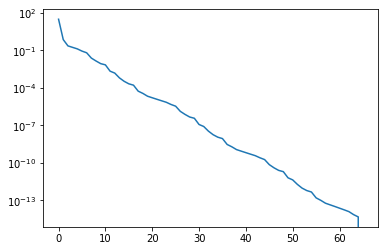

In [20]:
ax=sns.lineplot(x=np.arange(len(losses)),y=losses-losses[-1])
ax.set_yscale('log')

# Newton Method

There is no convergence plot for Newton method as it converges in a single step

In [10]:
x=np.array([0,0])
epsilon=1e-6
max_evals=10
alpha = 1
t=0.5
evals=0
loss, grad = objective(x),gradient(x)
losses = []
grads = []
new_x=np.array([1,1])

In [11]:
while np.linalg.norm(new_x-x)>epsilon and evals < max_evals:
    evals+=1
    x = new_x
    new_x = x - np.matmul(np.linalg.inv(hessian(x)),gradient(x))

In [12]:
x

array([-0.14285714,  0.78571429])